In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
#from math import ceil
#from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
#from sklearn.cluster import KMeans
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [10]:
df = pd.read_csv('../../data/dataset.csv')
df['fico_avg'] = df['fico_range'].str.split('-').apply(
    lambda x: sum([int(val) for val in x])/len(x)
    )

In [ ]:
def plot_residuals(y_pred, residuals):
    plt.scatter(y_pred, residuals, alpha=0.6) 
    plt.axhline(0, color='red', linestyle='--') 
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

In [ ]:
def plot_actual_vs_predicted(
    y_true,
    y_pred,
    y_label,
    scatter_color,
    line_color,
) -> None:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color=scatter_color, label="Predictions")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color=line_color, label="Ideal")
    plt.xlabel(f"Actual {y_label}")
    plt.ylabel(f"Predicted {y_label}")
    plt.title(f"Actual {y_label} vs Predicted {y_label}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_pipeline(X: pd.DataFrame, y: pd.DataFrame):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
    numeric_transformer = Pipeline(steps=[
        ("scaler", MinMaxScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, X.columns)
    ])

    model_pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", LinearRegression())
    ])
    model_pipeline.fit(X_train, y_train)
    score = model_pipeline.score(X_test, y_test)
    print(f"Test R^2 Score: {score:.4f}")
    y_pred = model_pipeline.predict(X_test)
    residuals = y_test - y_pred
    plot_residuals(y_pred, residuals)
    plot_actual_vs_predicted(y, y_pred, str(y.columns), 'green', 'red')

SyntaxError: expected ':' (910621710.py, line 1)

Test R^2 Score: 0.6585


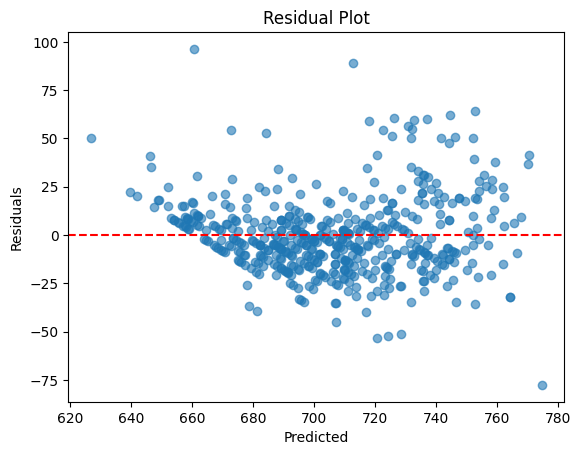

AttributeError: 'NoneType' object has no attribute 'show'

In [17]:


X = df.drop(columns=['fico_range', 'fico_avg'])
y = df['fico_avg']
plot_pipeline(X, y)


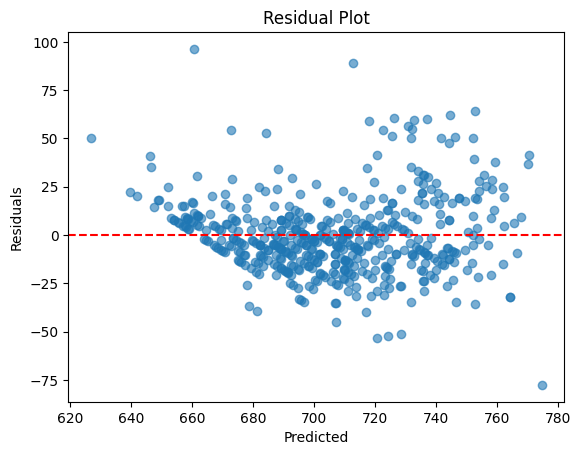

In [ ]:
X.columns

In [ ]:
alt.Chart()

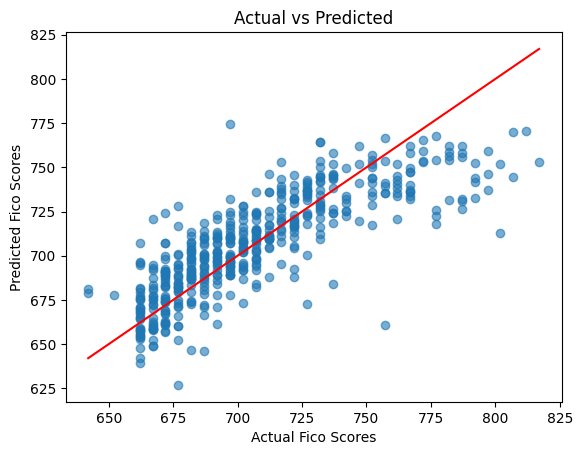

In [3]:
df = pd.read_csv('../../data/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [4]:
df.sample(10)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
1798,9.76,695-699,5000.0,5000.00,36.0
899,13.75,665-669,3000.0,1300.00,36.0
2021,15.80,675-679,11200.0,11200.00,36.0
1254,20.50,695-699,28200.0,28200.00,60.0
705,6.03,780-784,16000.0,15925.00,36.0
1030,14.74,675-679,11050.0,10878.55,36.0
1495,9.25,760-764,8400.0,8400.00,60.0
1096,22.95,680-684,30075.0,30050.00,60.0
2308,8.94,740-744,5000.0,4900.00,36.0
714,13.11,670-674,18000.0,18000.00,36.0


In [5]:
df.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [6]:
df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [7]:
encoder = LabelEncoder()
df['fico_range'] = encoder.fit_transform(df['fico_range'])

In [8]:
df.dtypes

interest_rate                 float64
fico_range                      int64
amount_requested              float64
amount_funded_by_investors    float64
loan_length                   float64
dtype: object

In [9]:
df['fico_range'].describe()

count    2498.000000
mean       13.171337
std         6.997416
min         0.000000
25%         8.000000
50%        12.000000
75%        17.000000
max        37.000000
Name: fico_range, dtype: float64

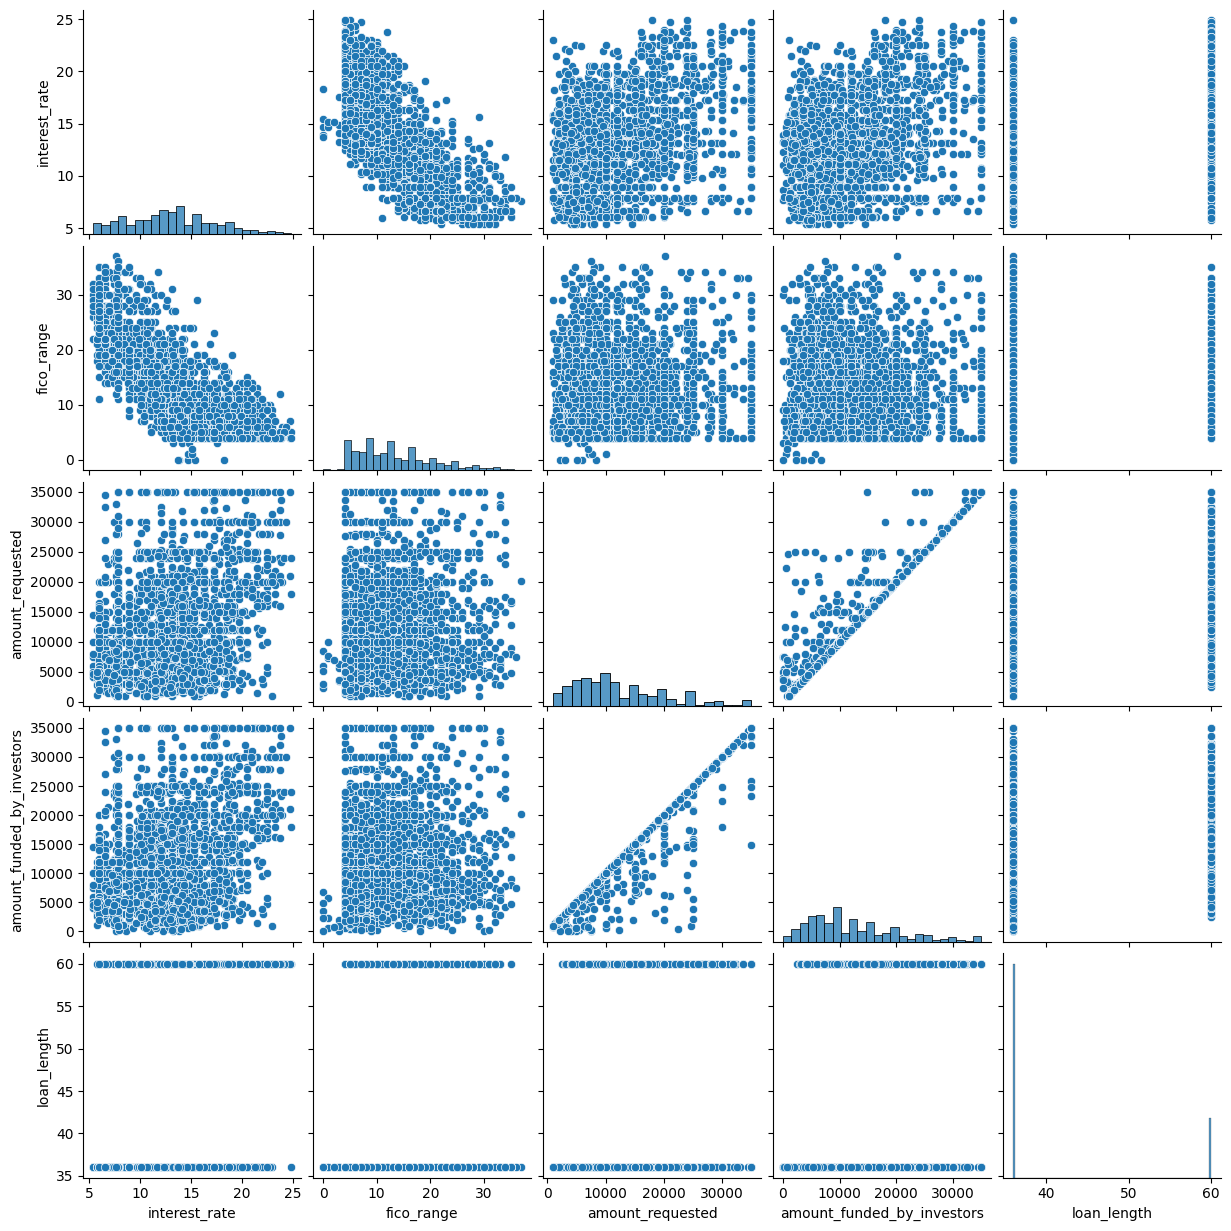

In [10]:
sns.pairplot(df)

#### Notes to scatter matrix

Most Noticable = Interest_rate w/ Amount funded by investors, amount requested.
6/16 shown to have a flat relationship 

#### Project Direction

Loan - Target to explores: 
X = Amount_requested, interest_rate, fico_range
y = loan_length

Investing/Brokerage
X = amount_funded_by_investors, fico_range
y = 


In [11]:
df.columns

Index(['interest_rate', 'fico_range', 'amount_requested',
       'amount_funded_by_investors', 'loan_length'],
      dtype='object')

In [19]:
fico_categories = df['fico_range'].sort_values().unique().tolist()

In [21]:
len(fico_categories)

38

In [ ]:
y_preds = lin_model.predict(X)
y_residuals = y - y_preds

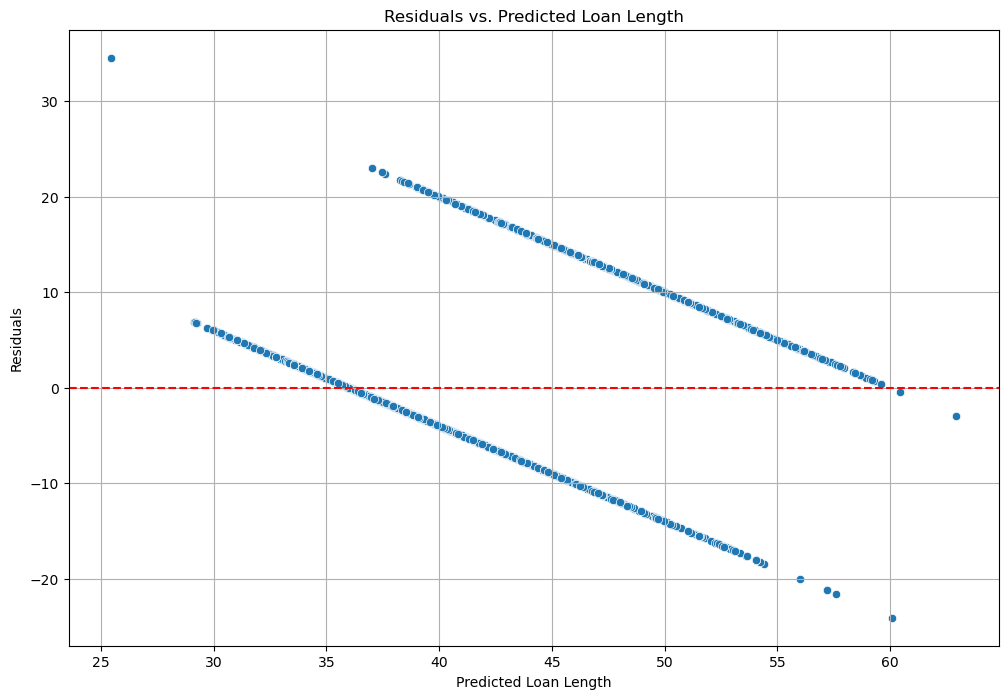

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=y_preds, y=y_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Loan Length')
plt.xlabel('Predicted Loan Length')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### 1. Project Objective
Clearly state the purpose of your analysis:

1. What business question were you trying to answer?
- - **What is the target audience for the ROI on their loan?**
2. What patterns or drivers of loan interest rates were you investigating?
3. Why does this question matter to business owners applying for loans?

### 2. Data Overview
Provide a clear, high-level summary of the dataset:

1. Which variables were most relevant to understanding loan rates or predicting loan outcomes?

### 3. Exploratory Insights
Show the key findings that emerged during your exploratory analysis:

1. Which features showed the strongest relationships or predictive potential?
2. Visualizations should highlight meaningful relationships, patterns, or trends.

### 4. Modeling Approach
Summarize the steps your modeling approach:

1. Which features ended up being most influential in the model's predictions?
2. How well did the model perform (use intuitive metrics or visuals)?

### 5. Key Results and Recommendations
End with a clear, decision-oriented summary:

1. What practical guidance could you give new business owners based on your results?